In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd()
while not (PROJECT_ROOT / "src").exists() and PROJECT_ROOT != PROJECT_ROOT.parent:
    PROJECT_ROOT = PROJECT_ROOT.parent
sys.path.append(str(PROJECT_ROOT / "src"))
from utils import get_processed_path

In [3]:
df = pd.read_csv(get_processed_path("trending_clean.csv"))
df.head()

,video_id,caption,create_time,webvideourl,videourl,videourlnowatermark,like_count,share_count,play_count,comment_count,...,covers_default,covers_origin,covers_dynamic,video_height,video_width,video_duration,caption_length,hashtag_count,engagement,engagement_rate
0,6907228749016714497,Confidence went 📈,2020-12-17 14:15:17,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,NaN,3710,50,44800,68,...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,15,17,0,3828,0.085446
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,2020-09-23 00:09:23,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,NaN,55700,1817,838100,936,...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,1024,576,11,112,0,58453,0.069745
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,2020-11-24 14:37:05,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,NaN,936200,21100,15300000,27100,...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,960,540,19,57,6,984400,0.064340
3,6902819837345533186,NaN,2020-12-05 17:06:27,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,NaN,12900,197,94900,143,...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,13,0,0,13240,0.139515
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,2020-12-13 07:13:20,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,NaN,8805,198,115300,52,...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,22,24,2,9055,0.078534


In [5]:
df["log_engagement"] = np.log1p(df["engagement"])
df[["engagement", "log_engagement"]].head()

,engagement,log_engagement
0,3828,8.250359
1,58453,10.975995
2,984400,13.799789
3,13240,9.491073
4,9055,9.111183


In [7]:
feature_cols = [
    "play_count",
    "caption_length",
    "hashtag_count",
    "video_duration",
    "author_verified"
]
X = df[feature_cols]
y = df["log_engagement"]
X.head(), y.head()

(   play_count  caption_length  hashtag_count  video_duration  author_verified
 0       44800              17              0              15            False
 1      838100             112              0              11            False
 2    15300000              57              6              19            False
 3       94900               0              0              13            False
 4      115300              24              2              22            False,
 0     8.250359
 1    10.975995
 2    13.799789
 3     9.491073
 4     9.111183
 Name: log_engagement, dtype: float64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5), (200, 5), (800,), (200,))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr, mae_lr, r2_lr

(2.673034480956973, 1.3282728967844246, -1.4030292387162815)

In [13]:
y_mean_pred = np.repeat(y_test.mean(), len(y_test))
rmse_mean = np.sqrt(mean_squared_error(y_test, y_mean_pred))
mae_mean = mean_absolute_error(y_test, y_mean_pred)
r2_mean = r2_score(y_test, y_mean_pred)
rmse_mean, mae_mean, r2_mean

(1.7243484597822611, 1.3367684123424306, 0.0)

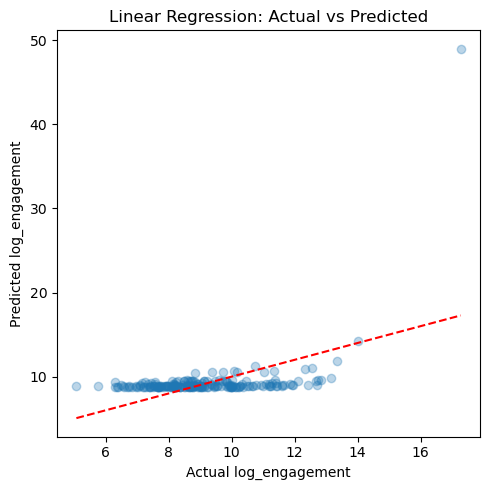

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--", color="red")
plt.xlabel("Actual log_engagement")
plt.ylabel("Predicted log_engagement")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [19]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf, mae_rf, r2_rf

(0.7059830665854788, 0.5529089988618179, 0.8323751115556632)

In [21]:
results = pd.DataFrame({
    "Model": ["Mean Baseline", "Linear Regression", "Random Forest"],
    "RMSE": [rmse_mean, rmse_lr, rmse_rf],
    "MAE": [mae_mean, mae_lr, mae_rf],
    "R2": [r2_mean, r2_lr, r2_rf]
})
results

,Model,RMSE,MAE,R2
0,Mean Baseline,1.724348,1.336768,0.000000
1,Linear Regression,2.673034,1.328273,-1.403029
2,Random Forest,0.705983,0.552909,0.832375


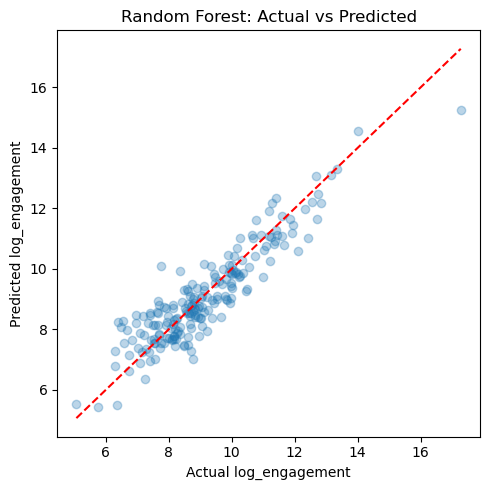

In [23]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--", color="red")
plt.xlabel("Actual log_engagement")
plt.ylabel("Predicted log_engagement")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()

In [27]:
feature_importance = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)
feature_importance

,feature,importance
0,play_count,0.872860
1,caption_length,0.052248
3,video_duration,0.046896
2,hashtag_count,0.026248
4,author_verified,0.001748


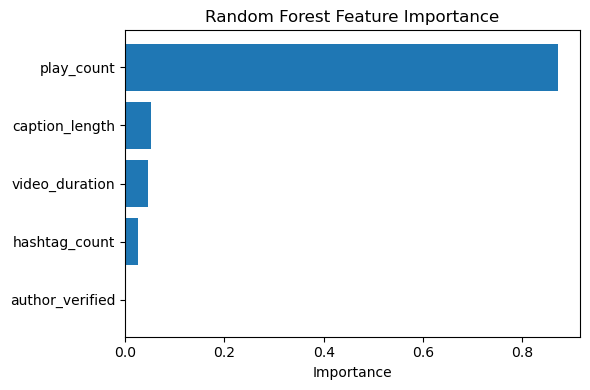

In [29]:
plt.figure(figsize=(6, 4))
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()